**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import math

**Reading the dataset**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/IR assignment/IR-assignment-2-data.txt", sep=' ', header=None)
df.drop(df.columns[[138]], axis = 1, inplace = True)
df = df[df[1] == 'qid:4']

**Sorting the dataset in decreasing order with respect to relevance**

In [ ]:
sorted_df = df.sort_values(by=[0], ascending=False, ignore_index=True)

In [ ]:
df

In [ ]:
sorted_df

# **PART 1&2:**

In [ ]:
# finding MAX DCG

maxDCG = 0
DCG = 0
relevance_dict = {}
no_of_files = 1

for i in range(sorted_df.shape[0]):
  relevance = sorted_df.iloc[i,0]
  if(i==0):
    maxDCG = sorted_df.iloc[i,0]
  else:
    maxDCG = maxDCG + relevance/math.log(i+1, 2)

  if relevance in relevance_dict:
    relevance_dict[relevance] += 1
  else:
    relevance_dict[relevance] = 1

#finding DCG

for i in range(df.shape[0]):
  relevance = df.iloc[i,0]
  if(i==0):
    DCG = df.iloc[i,0]
  else:
    DCG = DCG + relevance / math.log(i+1, 2)


print(f'Maximum Discounted Cumulative Gain (MDCG) is: {maxDCG} \n')
print(f'Discounted Cumulative Gain (DCG) is: {DCG} \n')


for r in relevance_dict:
  no_of_files = no_of_files * math.factorial(relevance_dict[r])

print(f'Number of possible files that could get MAXDCG are: {no_of_files}')


Maximum Discounted Cumulative Gain (MDCG) is: 20.989750804831445 

Discounted Cumulative Gain (MDCG) is: 12.550247459532576 

Number of possible files that could get MAXDCG are: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


# **Part-3**

In [ ]:
# Computing the total_DCG and DCG
total_dcg=DCG/maxDCG
print(f'Maximum Discounted Cumulative Gain (MDCG) for whole dataset is: {total_dcg} \n')
top_50=df.iloc[:50]
sorted_50_df = top_50.sort_values(by=[0], ascending=False, ignore_index=True)
max_DCG50=0
DCG50=0
for i in range(sorted_50_df.shape[0]):
  relevance = sorted_50_df.iloc[i,0]
  if(i==0):
    max_DCG50 = sorted_50_df.iloc[i,0]
  else:
    max_DCG50 = max_DCG50 + relevance/math.log(i+1, 2)

#finding DCG

for i in range(top_50.shape[0]):
  relevance = top_50.iloc[i,0]
  if(i==0):
    DCG50 = top_50.iloc[i,0]
  else:
    DCG50 = DCG50 + relevance / math.log(i+1, 2)
nDCG50=DCG50/max_DCG50
print(f'Discounted Cumulative Gain (DCG) for first 50 rows is: {nDCG50} \n')

Maximum Discounted Cumulative Gain (MDCG) for whole dataset is: 0.5979226516897831 

Discounted Cumulative Gain (DCG) for first 50 rows is: 0.5253808413557646 



# **Part-4**

Text(0.5, 1.0, 'Precison-Recall Graph')

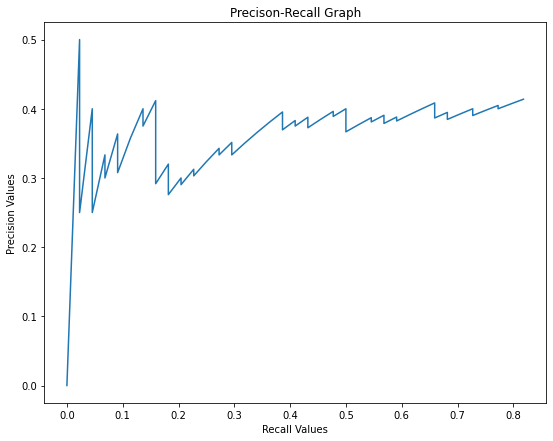

In [ ]:
#Performing the operation on the 75th feature of the dataset and ploting the precision and recall graph.
feature_75=df.iloc[:,76]
rel_array=df.iloc[:,0]
total_rel=0
for i in range(len(rel_array)):
  if(rel_array[i]>=1):
    total_rel=total_rel+1
    rel_array[i]=1
rel_dict = dict(zip(feature_75, rel_array))
sorted_rel_dict=sorted(rel_dict.items(),reverse=True)
precision=[]
recall=[]
temp_rel=0
count=0
for k,v in sorted_rel_dict:
  count=count+1
  if(v==1):
    temp_rel=temp_rel+1
  pre=temp_rel/count
  rec=temp_rel/total_rel
  precision.append(pre)
  recall.append(rec)
plt.figure(figsize=(9,7))
plt.plot(recall,precision)
plt.xlabel('Recall Values')
plt.ylabel('Precision Values')
plt.title('Precison-Recall Graph')




    
